<b>HOMEOWRK 1 </b>


<b>RUCHIKAA KANAR </b>

<i>Regularization. Using the accompanying Hitters dataset, we will explore
regression models to predict a player’s Salary from other variables. You must
python.
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad
 </i>

<i>1.1 </i>

<i>
Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. Comment on which are the
final three predictors that remain in the model. Use cross-validation to find the
optimal value of the regularization penality. How many predictors are left in
that model?
 </i>

In [35]:
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#LOADING THE DATASET HITTERS
datahit=pd.read_csv('Hitters.csv')

In [37]:
#CHECKING TO SEE IF LOADED CORRECTLY
datahit.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [38]:
#CHECKING TO SEE HOW MANY N/As ARE PRESENT IN THE DATASET.
datahit.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [39]:
#DROPPING THE N/As
datahitnew=datahit.dropna()


In [40]:
#CHECKING TO SEE IF LOADED CORRECTLY
datahitnew.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


NOW THAT WE HAVE CLEANED UP THE DATASET, WE HAVE TO DROP SOME VARIABLES IN ORDER TO START WORKING ON THE LASSO REGRESSION.

In [41]:
#DROPPING THE FOLLOWING
X = datahitnew.drop(['Unnamed: 0', 'Salary', 'Division', 'NewLeague', 'League'],axis = 1)

In [42]:
#CREATING THE TARGET: SALARY
Y = datahitnew['Salary']

BUILDING THE LASSO MODEL

In [43]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [44]:
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [45]:
lasscoefs = []
for i in alphas:
    lasso = Lasso(alpha=i, normalize = True, max_iter=10000)
    lasso.fit(X, Y)
    lasscoefs.append(lasso.coef_)

In [46]:
np.shape(lasscoefs)

(100, 16)

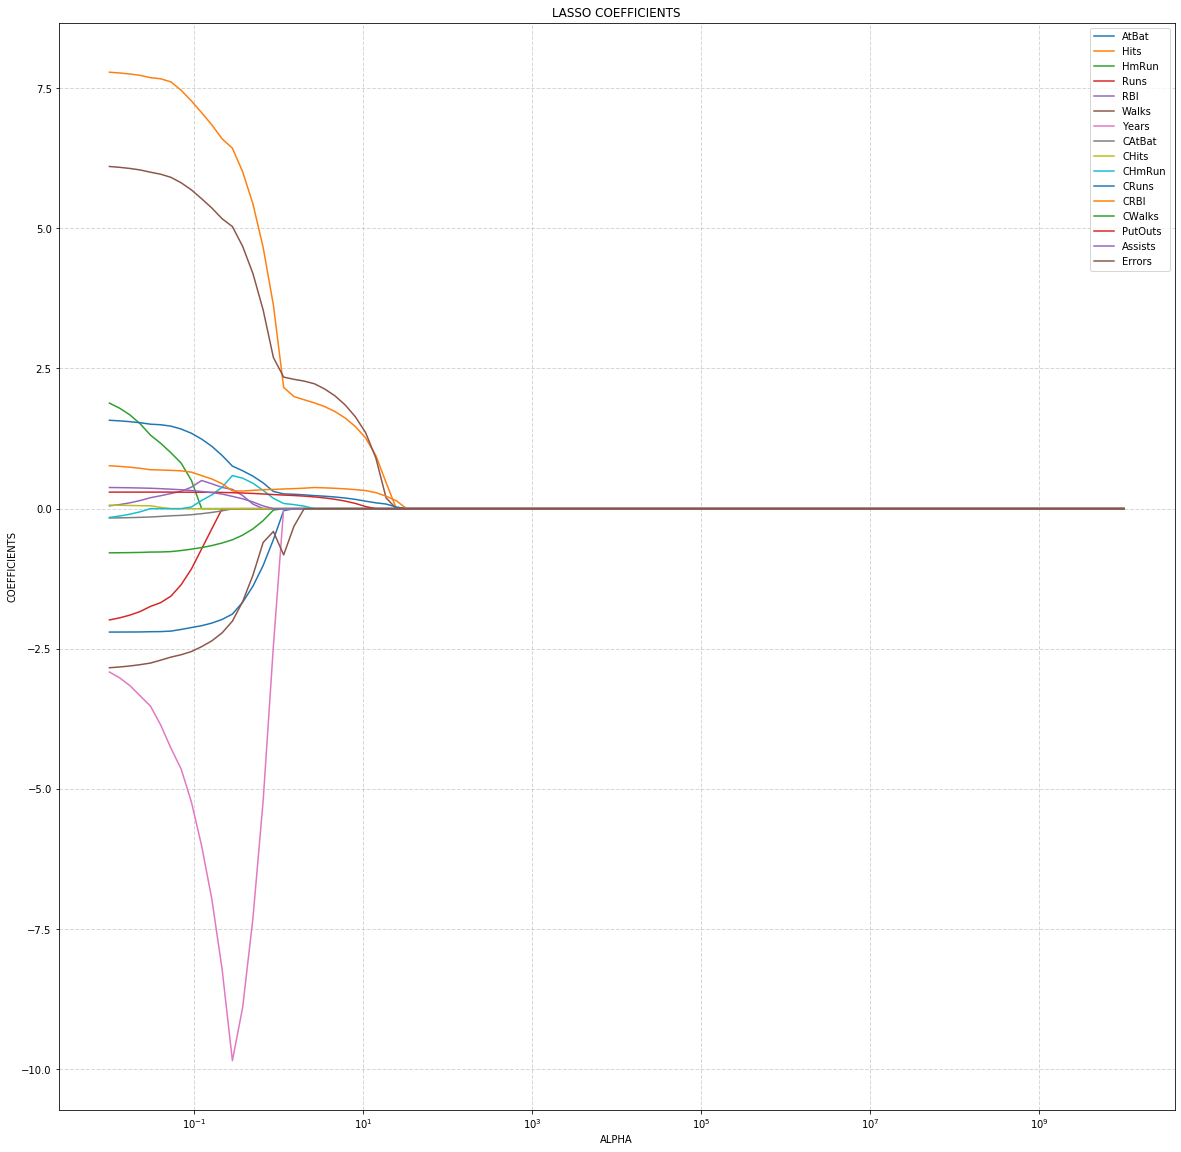

In [47]:
fig, ax = plt.subplots(figsize=(20,20))
ax = plt.gca()

ax.plot(alphas*2, lasscoefs)
ax.set_xscale('log')
plt.xlabel('ALPHA')
plt.ylabel('COEFFICIENTS')
plt.title('LASSO COEFFICIENTS')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(X.columns,loc=1)
plt.axis('tight')
plt.show()

In [48]:
# TRYING TO FIND THE LAST PREDICTORS IN THE MODEL
Col=X.columns
Col

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

In [49]:
# TRIED OTHER NUMBERS SUCH AS ALPHA=100,20 DID NOT WORK. HOWEVER ALPHA=10 WORKS AND GIVES US THE FOLLOWING 3 REMAINDER PREDICTORS.
Top3= Lasso(alpha=10, normalize = True, max_iter=10000).fit(X, Y).coef_
Col[abs(Top3) != 0]

Index(['Hits', 'CRuns', 'CRBI'], dtype='object')

<b>THE 3 PREDICTORS REMAINING ARE HITS, CRUNS, AND CRBI </b>

<i>CREATING A TRAIN AND TEST SET.</i>

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [52]:
from sklearn.metrics import mean_squared_error
CV = LassoCV(cv=100, alphas= None, normalize= True, max_iter=10000).fit(X, Y)
CV.fit(X_train, Y_train)
lasso.set_params(alpha=CV.alpha_)
print("Alpha=", CV.alpha_)
lasso.fit(X_train,Y_train)
print("MSE = ",mean_squared_error(Y_test, lasso.predict(X_test)))
print("BELOW ARE THE BEST MODEL COEFFs:")
pd.Series(lasso.coef_, index=X.columns)

Alpha= 0.05952347641375841
MSE =  112227.02520283543
BELOW ARE THE BEST MODEL COEFFs:


AtBat     -2.308733
Hits       5.618091
HmRun     -6.136785
Runs      -0.484910
RBI        5.035694
Walks      3.647788
Years     -0.000000
CAtBat    -0.383518
CHits      1.164065
CHmRun     1.545121
CRuns      0.655542
CRBI       0.000000
CWalks    -0.000000
PutOuts    0.455740
Assists    0.449725
Errors    -3.389148
dtype: float64

In [54]:
CV.score(X, Y)
print(CV.alpha_)

0.05952347641375841


<b>THE OPTIMAL VALUE FOR REGULARIZATION IS: 0.05952347641375841 </b>

In [56]:
last = Lasso(alpha=CV.alpha_, normalize = True, max_iter=10000).fit(X, Y).coef_
len(Col[abs(last) != 0])

15

In [57]:
last

array([-2.09253334e+00,  7.08538397e+00,  1.12334633e-04, -7.55749434e-01,
        5.08436378e-01,  5.54547174e+00, -5.91224099e+00, -9.15802967e-02,
        0.00000000e+00,  1.36070390e-01,  1.25435143e+00,  5.96278799e-01,
       -6.97853034e-01,  2.92986173e-01,  3.08256286e-01, -2.47177683e+00])

<b>THERE ARE ABOUT 15 PREDICTORS LEFT </b>

<i>1.2 </i>

<i>Repeat with Ridge Regression. Visualize coeffecient trajectories. Use crossvalidation to find the optimal vaule of the regularization penalty.</i>

In [58]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [59]:
ridgecoefs = []
for i in alphas:
    ridge = Ridge(alpha=i, normalize = True, max_iter=10000)
    ridge.fit(X, Y)
    ridgecoefs.append(ridge.coef_)

In [60]:
np.shape(ridgecoefs)

(100, 16)

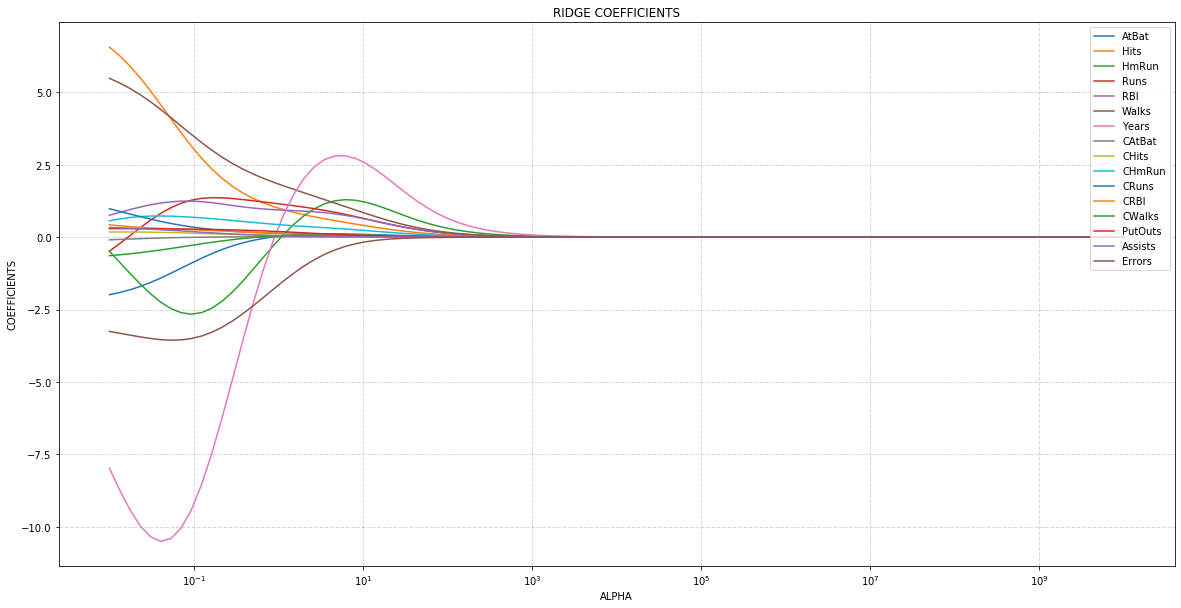

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
ax = plt.gca()

ax.plot(alphas*2, ridgecoefs)
ax.set_xscale('log')
plt.xlabel('ALPHA')
plt.ylabel('COEFFICIENTS')
plt.title('RIDGE COEFFICIENTS')
plt.grid(which='major',linestyle='--', linewidth=1,alpha=0.5)
plt.legend(X.columns,loc=1)
plt.axis('tight')
plt.show()

<i>CREATING A TRAIN AND TEST SET.</i>

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [63]:
RCV = RidgeCV(cv=10, normalize = True).fit(X, Y)
RCV.fit(X_train, Y_train)
ridge.set_params(alpha=RCV.alpha_)
print("Alpha=", RCV.alpha_)
ridge.fit(X_train,Y_train)
print("MSE = ",mean_squared_error(Y_test, ridge.predict(X_test)))
print("BELOW ARE THE BEST MODEL COEFFs:")
pd.Series(ridge.coef_, index=X.columns)

Alpha= 1.0
MSE =  103710.94178631302
BELOW ARE THE BEST MODEL COEFFs:


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AtBat      0.045991
Hits       0.692516
HmRun      0.653649
Runs       0.755135
RBI        1.256455
Walks      1.696205
Years      1.933840
CAtBat     0.008451
CHits      0.047159
CHmRun     0.424809
CRuns      0.097473
CRBI       0.107822
CWalks     0.104665
PutOuts    0.237132
Assists    0.001033
Errors     0.398092
dtype: float64

In [65]:
RCV.score(X, Y)
optimal_ridge=list(zip(Col,RCV.coef_))
print(RCV.alpha_)

1.0


In [66]:
lastRCV = Ridge(alpha=RCV.alpha_, normalize = True, max_iter=10000).fit(X, Y).coef_
len(Col[abs(lastRCV) != 0])

16

<i>2</i>

<i>Short Answer. Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.</i>

Lets first define a <b>Bias</b> and a <b>Variance</b>. <br>
<b>Bias:</b> The difference between the correct value we're trying to predict and the average prediction of our model. If a model has a high bias, you know that it pays little to no attention to the training data. It also over simplifies the model. The error is always/ most times higher in the Test and Training data. <br>
<b>Variance:</b> In simple terms variance is the variability of the model prediction for a certain data point. It tells us how "spread" the data is. A model that has a high variance will always look into the training data more deeply. It will not generalize on unknown data. This does extremely well on training data but does not perform too well on test data.

<b> What is Bias-Variance tradeoff?</b> <br>

If the model is very simple and does not have too many parameters, then it can be high bias and low variance. If the model has multiple parameters, it can have a high variance and low bias. There needs to be a good blance/fit. Overfitting and Underfitting is not a good result. <br>
With the above information we can say that to reduce bias we need to make the model more complex. It will increase the variance because it will dive deep into the data given. If you want to reduce the variance we have to make the model simpler. Taking that into consideration, we will have a higher bias. Thus showing that there's a traderoff.

<b>What role does regularization play in this tradeoff?</b>

In order to receive/acheive a good balance bettwen the variance and bias, we should reduce the variance to create a lower-bias model. This is the role of regularization during a tradeoff. Regularization can shrink and eliminate predictors that may cause higher bias and vairance.

<b>Make reference to your findings
in number (1) to describe models of high/low bias and variance.</b>

<b> Lasso Findings:</b> It uses the L1 as a penalty. Looking at the 1st graph we noticec that if we increase the Alpha, the penalty will increase as well. If we add or take more predictors into concideration, there will be little to no (0) influence. Thus causing a high bias and low variance. If we decide to reduce the penalty, there will be an opposite result: high variance and low bias. 

<b> Ridge Findings:</b> This one uses the L2 regularization penalty. It can lead to the coefficients being lower but it cannot make it a 0. Looking into the 2nd graph we notice that if we increase the Alpha, the penalty will for sure increase. Additional predictors can cause a lower influence. Thus the model will have a high bias and a low variance. Decreasing the penalty will give us an opposite result.